# 2019-yil uchun "28-May" supermarketidagi savdo holati

In [1]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [4]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/28-May.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,GOSIA BIRDEFELIK BOSQAB 6-LI,Plastik idishlar,1.07,2019-05-20,False
1,OZ DAD 560GR QARPIZ MUREBBESI,Shirinliklar,3.50,2019-05-20,False
2,B.YAG SPREDI LYUBIMOYE DADLI NEMET 82.5% KG,Yog'lar,7.60,2019-08-29,True
3,KONFITREYD 10GR SWEET BOX MAR.ZVERYATA SAFARI,Shirinliklar,4.00,2019-08-29,True
4,KONFIROM 396GR PECENYE OVSYANKA SOKOLADLI,Shirinliklar,2.60,2019-04-22,False
5,BINGO SOFT 2LT LOVELY YUMSALDICI,"Yuvish vositalari, tozalagichlar",4.45,2019-04-22,False
6,PAKMAYA 80GR PASTA SUSU BAKIR BONCUK,Ziravorlar,3.45,2019-04-22,False
7,REBER 830GR QUTU SOKOLAD,Shirinliklar,110.35,2019-04-22,False
8,ZOLOTOE ZERNO 180GR KISEL ERIK,"Kofe, kakao va h.k",0.90,2019-04-22,False
9,KOLBASA H.N.SERVELAT IPLI KG,Kolbasa va sosiskalar,11.15,2019-04-22,False


In [5]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21043 entries, 0 to 21042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21043 non-null  object 
 1   mahsulot_turi   21043 non-null  object 
 2   mahsulot_narhi  21043 non-null  float64
 3   sotilgan_vaqti  21043 non-null  object 
 4   bonus_karta     21043 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 678.3+ KB


In [6]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [7]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21043 entries, 0 to 21042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21043 non-null  object        
 1   mahsulot_turi   21043 non-null  object        
 2   mahsulot_narhi  21043 non-null  float64       
 3   sotilgan_vaqti  21043 non-null  datetime64[ns]
 4   bonus_karta     21043 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 678.3+ KB


In [8]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2152
1851
2293
2089
2015
2142
2210
2115
1956
2215
5
0


In [9]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2152
1851
2293
2089
2015
2142
2210
2115
1956
2215
0
0


In [10]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,GOSIA BIRDEFELIK BOSQAB 6-LI,Plastik idishlar,1.07,2019-05-20,False
1,OZ DAD 560GR QARPIZ MUREBBESI,Shirinliklar,3.50,2019-05-20,False
2,B.YAG SPREDI LYUBIMOYE DADLI NEMET 82.5% KG,Yog'lar,7.60,2019-08-29,True
3,KONFITREYD 10GR SWEET BOX MAR.ZVERYATA SAFARI,Shirinliklar,4.00,2019-08-29,True
4,KONFIROM 396GR PECENYE OVSYANKA SOKOLADLI,Shirinliklar,2.60,2019-04-22,False
...,...,...,...,...,...
21038,FIRIN.QARABAG KETESI FINDIQLI KG,Shirinliklar,7.50,2019-04-11,True
21039,FAIRY TABLET 22-LI LIMON KOKULU,Idish yuvish vositalari,12.65,2019-04-11,True
21040,KUBANSKAYA MARKA 480GR TOMAT PASTASI,Konservalangan sabzavotlar,1.95,2019-04-11,True
21041,SIGARET WEST FUSION WHITE,Tamaki mahsulotlari,2.20,2019-04-11,True


In [12]:
#9 2019-yilda "28-May" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4815
Maishiy buyumlar,1210
"Yuvish vositalari, tozalagichlar",1040
Mevali sharbatlar,1001
Idish-tovoq,774
...,...
Suzma,23
Kefir,15
Tayyor ovqatlar,15
Muzlatilgan mahsulotlar,12


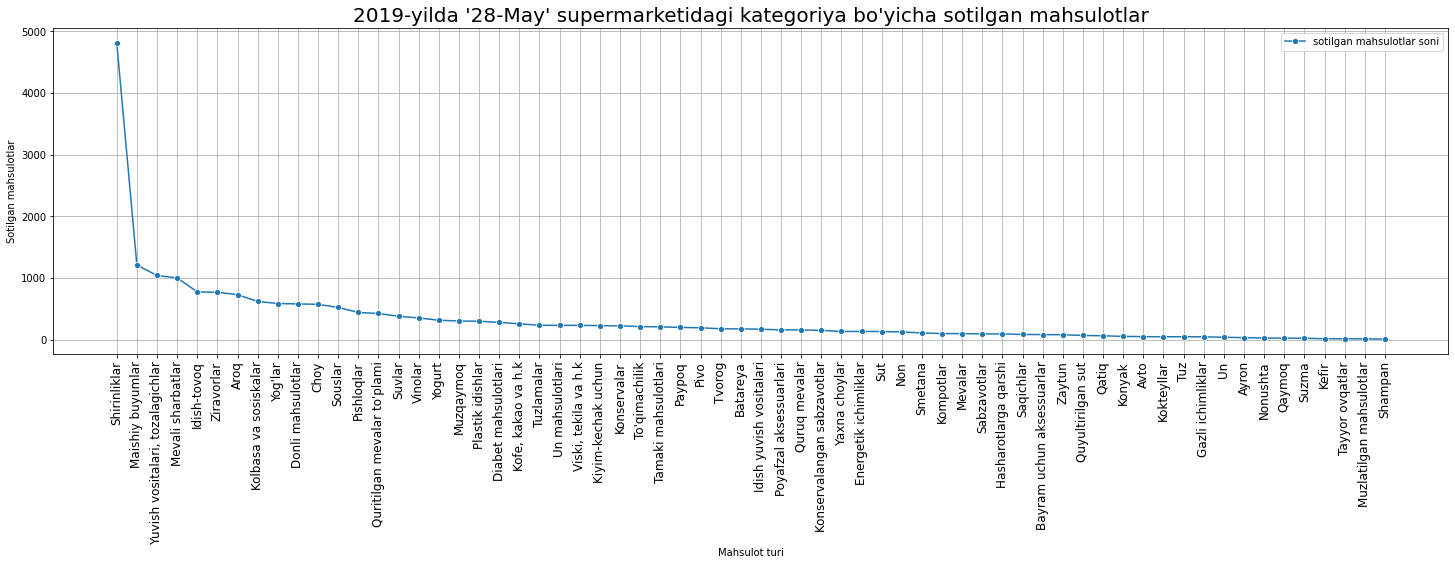

In [13]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda '28-May' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [14]:
#10 2019-yilda "28-May" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10267.93
Avto,252.74
Ayron,19.84
Batareya,686.44
Bayram uchun aksessuarlar,247.47
...,...
Yog'lar,5428.26
Yogurt,412.57


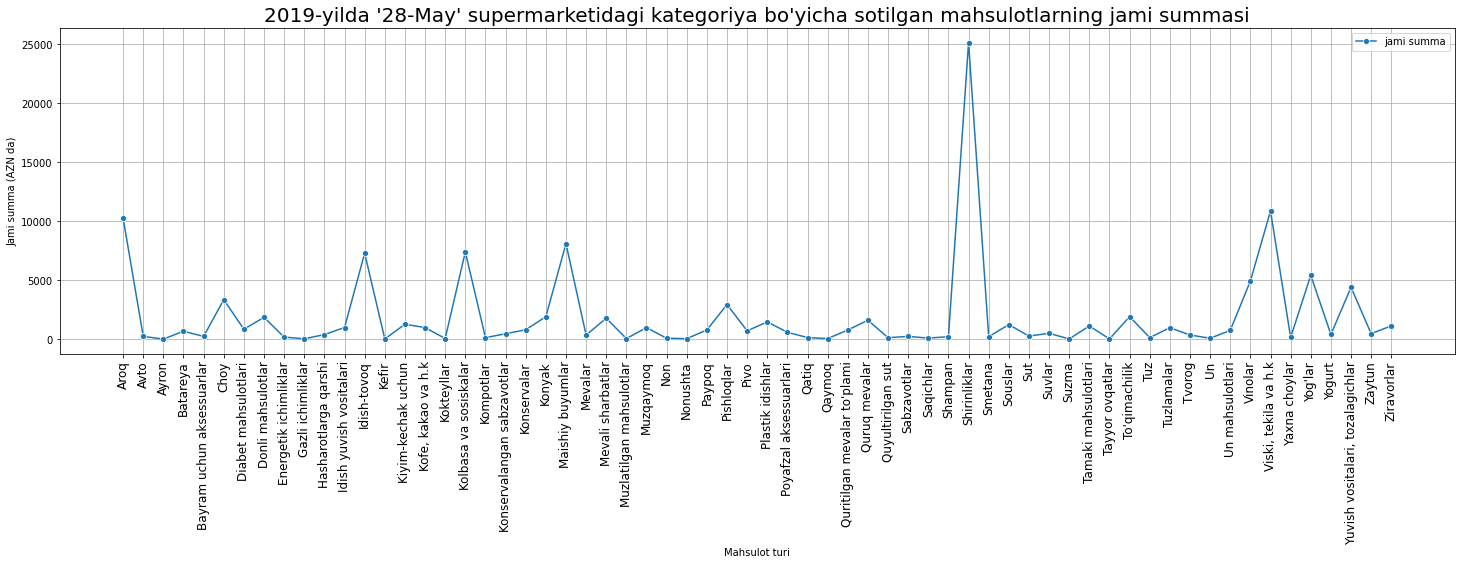

In [15]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda '28-May' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [16]:
#11 2019-yilda "28-May" supermarketida nechta mijoz mahsulotni bonus karta orqali 
#xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10575,10463


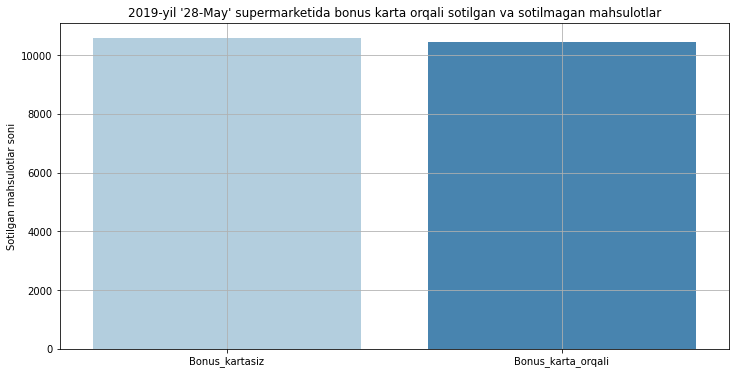

In [17]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil '28-May' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [18]:
#12 2019-yilda "28-May" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2152
Fevral,1851
Mart,2293
Aprel,2089
May,2015
Iyun,2142
Iyul,2210
Avgust,2115
Sentabr,1956
Oktabr,2215


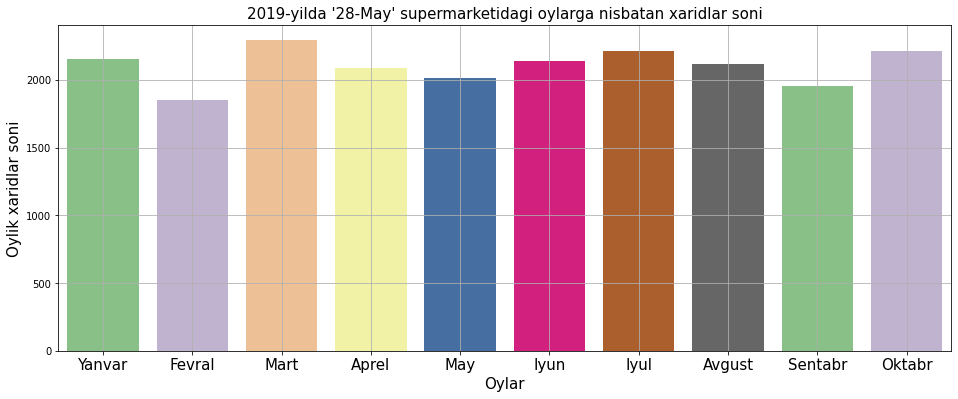

In [19]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda '28-May' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [20]:
#13 2019-yilda "28-May" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2975
Seshanba,2887
Chorshanba,3113
Payshanba,3082
Juma,3005
Shanba,3044
Yakshanba,2932


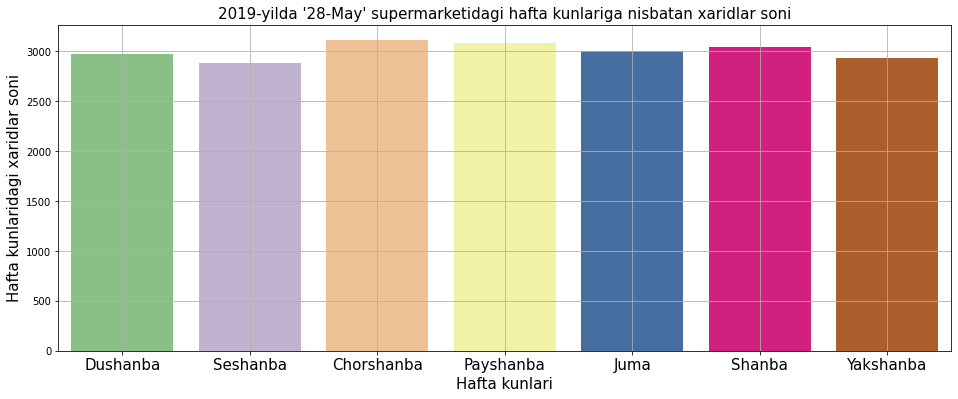

In [21]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda '28-May' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [22]:
#14 2019-yilda "28-May" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,630
2,806
3,755
4,643
5,603
6,777
7,648
8,735
9,608
10,612


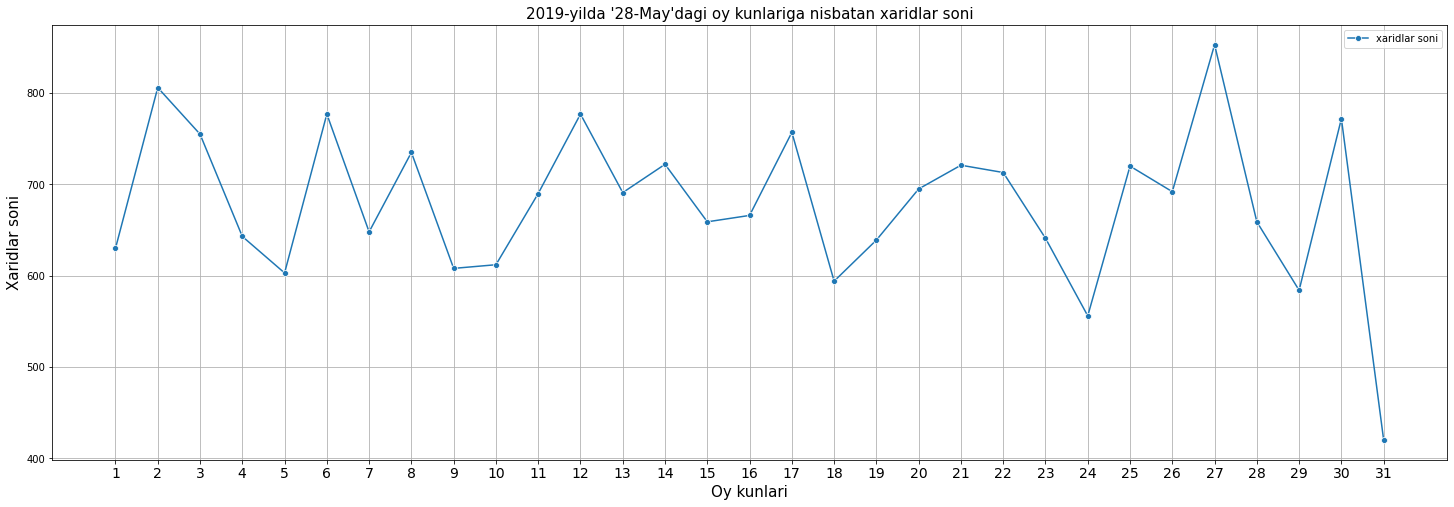

In [23]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda '28-May'dagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [24]:
#15 2019-yil '28-May' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [25]:
len(oy_sanalari)

310

In [26]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [27]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [28]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,52,88,72,31,69,94,56,68,78,88,84,61,70,64,38,65,64,66,52,36,38,85,85,72,64,117,99,53,59,117,67
Fevral,55,69,67,81,40,86,53,72,79,69,89,93,41,30,65,40,87,42,44,40,120,37,48,71,59,59,121,94,0,0,0
Mart,109,81,83,105,83,86,70,111,36,63,77,31,61,115,75,114,54,41,106,82,66,44,55,45,74,49,80,55,51,116,75
Aprel,64,122,61,69,54,84,48,78,69,45,66,69,56,40,87,61,56,61,55,77,76,67,88,70,65,56,124,54,71,96,0
May,74,92,56,77,63,59,86,55,32,40,45,83,111,54,47,83,68,29,44,62,27,62,42,83,83,58,82,49,85,116,68
Iyun,51,73,78,38,54,81,81,48,50,61,64,108,59,117,100,49,90,73,79,78,98,99,63,27,65,94,62,72,82,48,0
Iyul,48,76,114,64,30,78,66,74,83,75,73,77,60,71,55,42,103,89,48,95,70,120,38,50,69,81,52,95,37,122,55
Avgust,34,76,63,86,79,56,29,103,59,53,53,92,45,56,56,81,66,63,77,77,109,80,50,54,88,64,70,84,75,64,73
Sentabr,81,69,74,24,58,81,71,60,68,53,57,100,113,88,78,71,121,48,57,56,49,52,69,37,55,23,78,46,83,36,0
Oktabr,62,60,87,68,73,72,88,66,54,65,82,63,75,87,58,60,48,82,77,92,68,67,103,47,98,91,85,57,41,57,82


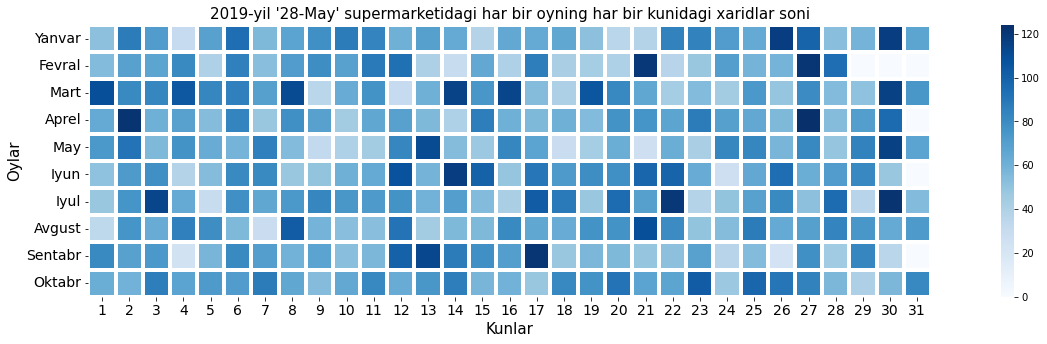

In [29]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil '28-May' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

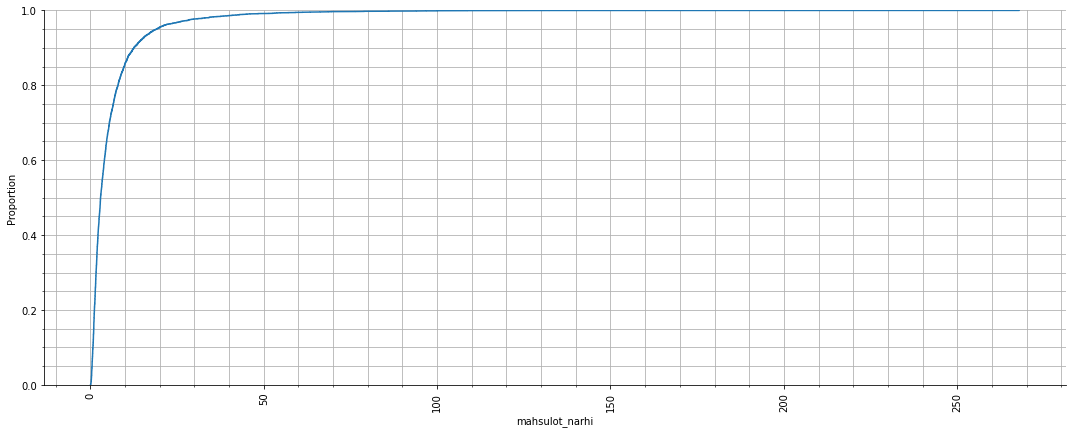

In [34]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()